# To Explore Decision Tree Algorithm.
## Sourabh Khiwansra.
#### Aim: To visualize decision tree with the help of graphviz and pydotplus libraries.

#### The Model contains following parts:
    1.) Importing Libraries.
    2.) Loading the dataset.
    3.) Selecting the features.
    4.) Splitting Data.
    5.) Decision Tree Model building.
    6.) Evaluating model.
    7.) Visualizing the tree.

### 1.) Importing Essential Libraries.

In [130]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
import numpy as np

### 2.) Loading Iris Dataset.

In [131]:
iris=datasets.load_iris()
iris_df=pd.DataFrame(iris.data,columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [132]:
# Checking Null Values.
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [133]:
print(iris.target_names)
print(np.unique(iris.target))

['setosa' 'versicolor' 'virginica']
[0 1 2]


In [134]:
iris_df['Target']=iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### 3.) Feature Selection.

In [135]:
feature_cols=iris.feature_names
feature_cols

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [136]:
x=iris_df[feature_cols]
y=iris_df['Target']

### 4.) Splitting the Data.

In [142]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

70% Data is used in training and remaining 30% is used as test data to determin the accuracy of the model.

### 5.) Building Decision Tree Model.

In [143]:
clf=DecisionTreeClassifier()
clf=clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

Alright, model has been created time to evaluate it with test data.

### 6.) Evaluating the model.

In [144]:
print('Accuaracy Score:',metrics.accuracy_score(y_test,y_pred))

Accuaracy Score: 0.9777777777777777


In [145]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



### 7.) Visualizing Decision Tree.

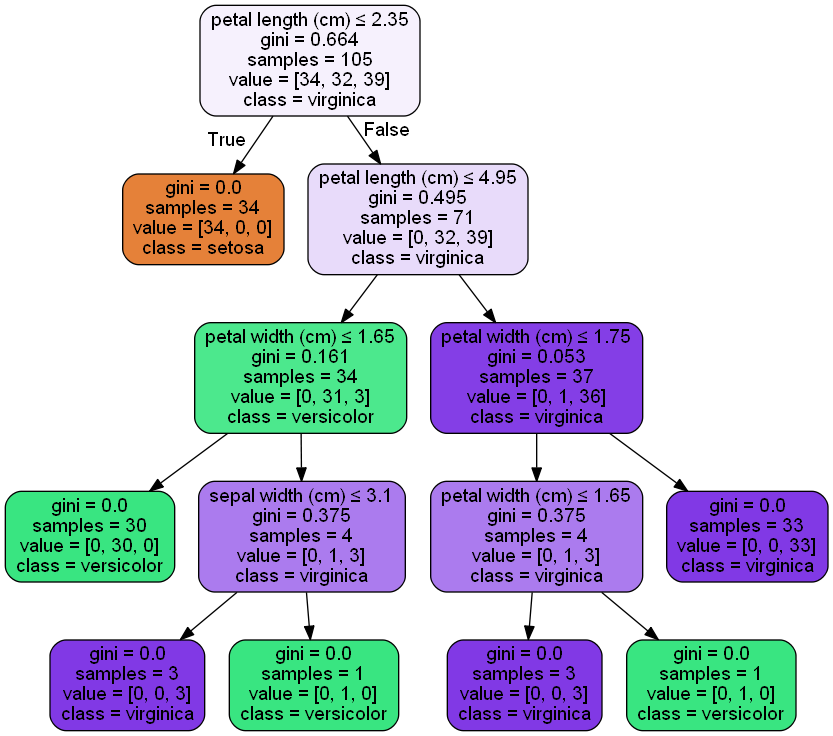

In [146]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, feature_names=iris.feature_names,  
                filled=True, rounded=True,
                special_characters=True,class_names=iris.target_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Thanks.